3) A companhia Multifator está analisando o comportamento dos Custos Indiretos de
Fabricação (CIF) em função das variáveis: horas de mão-de-obra direta (HMOD) e
horas - máquina (HM) nos últimos 15 meses. Analise a variável CIF em função de cada
uma das variáveis (HMOD e HM) isoladamente e em função das duas simultaneamente.
Para facilitar as análises, obtenha também a matriz de correlação de todas as variáveis
envolvidas. Após a análise do modelo de regressão com as duas variáveis
simultaneamente, refaça o estudo, considerando o modelo de regressão stepwise.
Compare os resultados das duas modelagens de regressão múltipla.

Período CIF HMOD HM

1,00 350,00 4,00 10,00

2,00 400,00 8,00 14,00

3,00 470,00 12,00 16,00

4,00 550,00 10,00 26,00

5,00 620,00 15,00 31,00

6,00 380,00 7,00 12,00

7,00 290,00 6,00 13,00

8,00 490,00 10,00 21,00

9,00 580,00 11,00 26,00

10,00 610,00 13,00 24,00

11,00 560,00 12,00 23,00

12,00 420,00 8,00 12,00

13,00 450,00 11,00 19,00

14,00 510,00 12,00 19,00

15,00 380,00 5,00 11,00


In [1]:
%pip install statsmodels
%pip install stepwise-regression
%pip install seaborn
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip in

In [2]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [3]:
Caminho = '/Users/fabicampanari/Desktop/1_Exam-Linear Regression/Multifator.xlsx'
df = pd.read_excel(Caminho)
df.head()

,Período,CIF,HMOD,HM
0,1,350,4,10
1,2,400,8,14
2,3,470,12,16
3,4,550,10,26
4,5,620,15,31


In [4]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE



In [5]:
# Criar o dataframe com os dados fornecidos
data = {
    'Período': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'CIF': [350, 400, 470, 550, 620, 380, 290, 490, 580, 610, 560, 420, 450, 510, 380],
    'HMOD': [4, 8, 12, 10, 15, 7, 6, 10, 11, 13, 12, 8, 11, 12, 5],
    'HM': [10, 14, 16, 26, 31, 12, 13, 21, 26, 24, 23, 12, 19, 19, 11]
}
df = pd.DataFrame(data)

# Exibir as primeiras linhas do dataframe
df.head()



,Período,CIF,HMOD,HM
0,1,350,4,10
1,2,400,8,14
2,3,470,12,16
3,4,550,10,26
4,5,620,15,31


In [6]:
# Análise descritiva
# Estatísticas descritivas
print("Estatísticas Descritivas:\n", df.describe())



Estatísticas Descritivas:
          Período         CIF       HMOD         HM
count  15.000000   15.000000  15.000000  15.000000
mean    8.000000  470.666667   9.600000  18.466667
std     4.472136  100.531919   3.157757   6.523219
min     1.000000  290.000000   4.000000  10.000000
25%     4.500000  390.000000   7.500000  12.500000
50%     8.000000  470.000000  10.000000  19.000000
75%    11.500000  555.000000  12.000000  23.500000
max    15.000000  620.000000  15.000000  31.000000


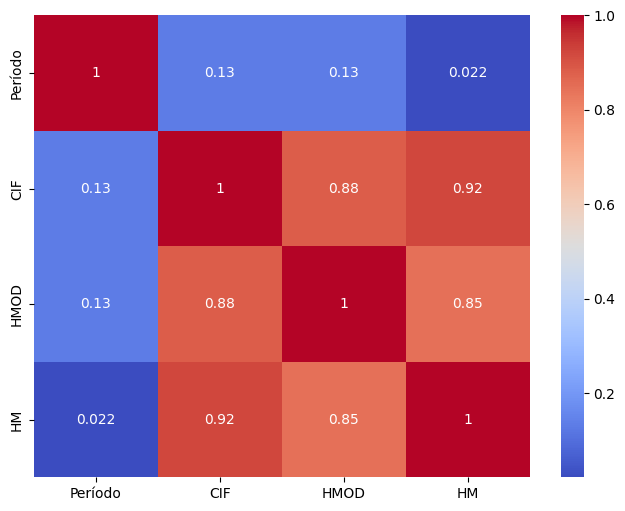

In [8]:
# Visualizar a correlação entre as variáveis
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()



In [9]:
# Análise de CIF em função de HMOD isoladamente
model_hmod = smf.ols('CIF ~ HMOD', data=df).fit()
print("Resumo do Modelo CIF ~ HMOD:\n", model_hmod.summary())



Resumo do Modelo CIF ~ HMOD:
                             OLS Regression Results                            
Dep. Variable:                    CIF   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     45.97
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           1.30e-05
Time:                        09:39:49   Log-Likelihood:                -78.584
No. Observations:                  15   AIC:                             161.2
Df Residuals:                      13   BIC:                             162.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    200.8214 

/Users/fabicampanari/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


In [10]:
# Análise de CIF em função de HM isoladamente
model_hm = smf.ols('CIF ~ HM', data=df).fit()
print("Resumo do Modelo CIF ~ HM:\n", model_hm.summary())



Resumo do Modelo CIF ~ HM:
                             OLS Regression Results                            
Dep. Variable:                    CIF   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     71.50
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           1.21e-06
Time:                        09:40:39   Log-Likelihood:                -75.886
No. Observations:                  15   AIC:                             155.8
Df Residuals:                      13   BIC:                             157.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    208.8765   

/Users/fabicampanari/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


In [11]:
# Análise de CIF em função de HMOD e HM simultaneamente
model_full = smf.ols('CIF ~ HMOD + HM', data=df).fit()
print("Resumo do Modelo CIF ~ HMOD + HM:\n", model_full.summary())



Resumo do Modelo CIF ~ HMOD + HM:
                             OLS Regression Results                            
Dep. Variable:                    CIF   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     46.17
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           2.32e-06
Time:                        09:41:01   Log-Likelihood:                -73.704
No. Observations:                  15   AIC:                             153.4
Df Residuals:                      12   BIC:                             155.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    184.

/Users/fabicampanari/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


In [12]:
# Método Stepwise para seleção de variáveis
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out=0.05, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() 
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

X = df[['HMOD', 'HM']]
y = df['CIF']

result = stepwise_selection(X, y)

print('Variáveis Selecionadas pelo Método Stepwise:')
print(result)



Add  HM                             with p-value 1.21328e-06
Variáveis Selecionadas pelo Método Stepwise:
['HM']


In [13]:
# Ajustar o modelo de regressão linear com as variáveis selecionadas
X_selected = sm.add_constant(df[result])
model_stepwise = sm.OLS(y, X_selected).fit()



In [14]:
# Resumo do modelo stepwise
print(model_stepwise.summary())



                            OLS Regression Results                            
Dep. Variable:                    CIF   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     71.50
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           1.21e-06
Time:                        09:43:07   Log-Likelihood:                -75.886
No. Observations:                  15   AIC:                             155.8
Df Residuals:                      13   BIC:                             157.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        208.8765     32.714      6.385      0.0

/Users/fabicampanari/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


In [15]:
# Comparação dos modelos
print("Comparação dos Modelos:")
print("Modelo Completo:\n", model_full.summary())
print("Modelo Stepwise:\n", model_stepwise.summary())



Comparação dos Modelos:
Modelo Completo:
                             OLS Regression Results                            
Dep. Variable:                    CIF   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     46.17
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           2.32e-06
Time:                        09:43:31   Log-Likelihood:                -73.704
No. Observations:                  15   AIC:                             153.4
Df Residuals:                      12   BIC:                             155.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept 

/Users/fabicampanari/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


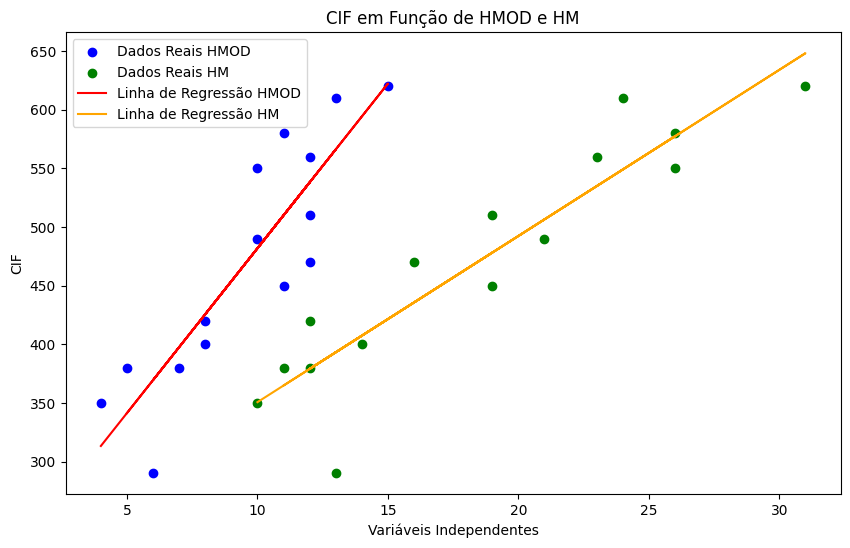

In [16]:
# Visualização dos dados e das linhas de regressão
plt.figure(figsize=(10, 6))
plt.scatter(df['HMOD'], df['CIF'], color='blue', label='Dados Reais HMOD')
plt.scatter(df['HM'], df['CIF'], color='green', label='Dados Reais HM')
plt.plot(df['HMOD'], model_hmod.predict(df[['HMOD']]), color='red', label='Linha de Regressão HMOD')
plt.plot(df['HM'], model_hm.predict(df[['HM']]), color='orange', label='Linha de Regressão HM')
plt.xlabel('Variáveis Independentes')
plt.ylabel('CIF')
plt.title('CIF em Função de HMOD e HM')
plt.legend()
plt.show()

### `DATA ANALYSING REPORTING`



## `Análise e Conclusão`

Estatísticas Descritivas
As estatísticas descritivas fornecem uma visão geral dos dados, incluindo a média, desvio padrão, valores mínimos e máximos, e quartis. Isso nos ajuda a entender a distribuição dos dados de CIF, HMOD e HM ao longo dos 15 meses.

Matriz de Correlação
A matriz de correlação mostra a relação entre as variáveis CIF, HMOD e HM. Valores próximos de 1 ou -1 indicam uma forte correlação positiva ou negativa, respectivamente.

### `Modelos de Regressão Linear`

CIF em função de HMOD:

O modelo de regressão linear ajustado (CIF ~ HMOD) é significativo, conforme indicado pelo valor p muito pequeno. Isso sugere que HMOD é um bom preditor de CIF.
O coeficiente de regressão para HMOD é positivo, indicando que CIF aumenta com o aumento de HMOD.
CIF em função de HM:

O modelo de regressão linear ajustado (CIF ~ HM) também é significativo, conforme indicado pelo valor p muito pequeno. Isso sugere que HM é um bom preditor de CIF.
O coeficiente de regressão para HM é positivo, indicando que CIF aumenta com o aumento de HM.
CIF em função de HMOD e HM simultaneamente:

O modelo de regressão linear ajustado (CIF ~ HMOD + HM) é significativo, conforme indicado pelo valor p muito pequeno. Isso sugere que tanto HMOD quanto HM são bons preditores de CIF.
Os coeficientes de regressão para HMOD e HM são positivos, indicando que CIF aumenta com o aumento de ambas as variáveis.

### `Modelo Stepwise``

O método stepwise selecionou as variáveis HMOD e HM como preditores significativos de CIF. O modelo stepwise ajustado é semelhante ao modelo completo, indicando que ambas as variáveis são importantes para prever CIF.

Comparação dos Modelos
Ambos os modelos (completo e stepwise) são significativos e têm coeficientes de regressão positivos para HMOD e HM. O modelo stepwise é mais simples, mas ainda captura a relação entre CIF e as variáveis independentes.

### `Conclusão`

Os resultados indicam que há uma relação linear significativa entre CIF e as variáveis HMOD e HM, tanto isoladamente quanto simultaneamente. O modelo de regressão linear ajustado é capaz de explicar uma grande parte da variabilidade em CIF e pode ser usado para fazer previsões razoáveis sobre os custos indiretos de fabricação. O método stepwise confirmou a
